# Task

#### The task was to perform an exploratory data analysis on the given dataset of few days of a patient 

### Modules

#### The code conists of three modules containing functions for visualization, statistics and data loading

### Visualization module

#### This module consists of visualization functions such as histogram, box plot, etc.

In [69]:
import pandas as pd
from matplotlib import pyplot as plt

class visualization:
  
    def histogram( self, dataframe: pd.DataFrame ) -> None:

        # Perform operation only if the dataframe is not empty
        if len( dataframe.columns ) != 0:
            dataframe.hist( figsize = ( 15, 10 ) )

    def boxplot( self, dataframe: pd.DataFrame ) -> None:

        if len( dataframe.columns ) != 0:
            dataframe.boxplot( figsize = ( 15, 10 ), rot=45 )


    def scatterMatrix( self, dataframe: pd.DataFrame ) -> None:

        if len( dataframe.columns ) != 0:
            axes = pd.plotting.scatter_matrix( dataframe, figsize = ( 15, 10 ) )

            for ax in axes.flatten():

                ax.xaxis.label.set_rotation( 90 )
                ax.yaxis.label.set_rotation( 0 )
                ax.yaxis.label.set_ha( "right" )

            plt.gcf().subplots_adjust( wspace = 0, hspace = 0 )
            plt.show()

    def dayToDayMeanTrend( self, dataframe: pd.DataFrame, subplotEnabled: bool, columnName: str ) -> None:

        if columnName in dataframe.columns:
            temporaryDataframe = dataframe.copy( deep=True )

            temporaryDataframe[ columnName ] = temporaryDataframe[ columnName ].dt.date

            meanByDay = temporaryDataframe.groupby( [ columnName ] ).mean()

            meanByDay.plot.line( subplots = subplotEnabled, figsize = ( 15, 10 ) ) 

        else:
            raise NameError( "Given column with name not present" )

### Statistics Module

#### This module consists of statistical functions such as correlation scores, skewness, outliers, etc.

In [70]:
import numpy as np
from scipy.stats import zscore

class statistics:
    
    def missingValues( self, dataframe: pd.DataFrame ) -> pd.DataFrame:
  
        return dataframe.isnull().sum()
  
    def correlation( self, dataframe: pd.DataFrame ) -> pd.DataFrame:
  
        return dataframe.corr( method="pearson" )
  
    def Zscore( self, dataframe: pd.DataFrame ) -> pd.DataFrame:

        return dataframe.select_dtypes( include=[np.number] ).apply( zscore )
  
    def skewness( self, dataframe: pd.DataFrame ) -> pd.DataFrame:
  
        return dataframe.skew( axis=0 )
  
    def countOutliers( self, dataframe: pd.DataFrame, zscoreRange: float ) -> None:
  
        outlierCount = dataframe.gt( zscoreRange ).sum() \
                                          .add( dataframe.lt( -zscoreRange ).sum(), fill_value = 0 )

        print( "\nWhen zscore range = {0}\n".format( zscoreRange ) )
        print( outlierCount )
        print( "\nPercentage of outliers \n" )
        print( ( ( outlierCount / dataframe.shape[0] ) * 100 ).round( 2 ).astype( str ) + "%" ) 

### Loading module

#### This module loads the data and performs preprocessing on it

In [71]:
class dataframeLoader:
  

    def __init__( self ) -> None:

        self.baseDataframe = None

    def loadData( self, filename: str ) -> None:

        sheet_names = pd.ExcelFile( filename ).sheet_names

        dataframe = pd.read_excel( filename, sheet_names[0] )

        for i in range( 1, len( sheet_names ) ):
            dataframe = dataframe.append( pd.read_excel( filename, sheet_names[i] ) )

        self.baseDataframe = dataframe.reset_index( drop=True )

    def getDataframe( self ) -> pd.DataFrame:

        return self.baseDataframe

    def oneHotEncode( self ) -> None:

        self.baseDataframe = pd.get_dummies( self.baseDataframe )

### Main processing

#### The cells below call the functions and describes the results found after analyzing them

In [72]:
# Create the objects of the modules to call their functions

loaderObject = dataframeLoader()
visualizationObject = visualization()
statisticsObject = statistics()

loaderObject.loadData( "example_data_home_based_turning.xls" )
  
loaderObject.oneHotEncode()
  
dataframe = loaderObject.getDataframe()

### Generating visualization #1 ( Box plot )

This shows that Outlier of peak angular velocity using distribution

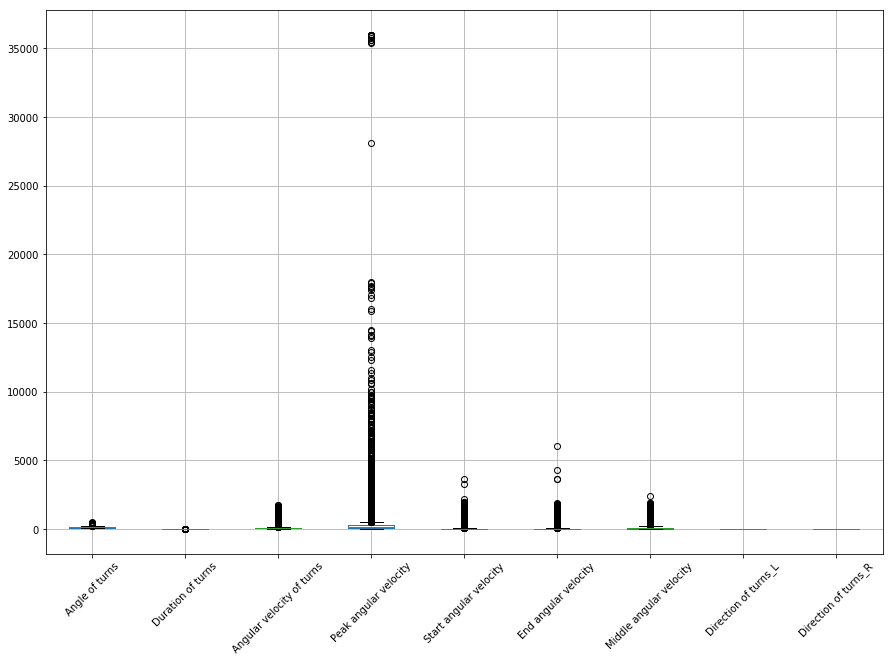

In [73]:
visualizationObject.boxplot( dataframe = dataframe )

### Generating visualization #2 ( histogram )

This shows that univariant data analysis of outlier

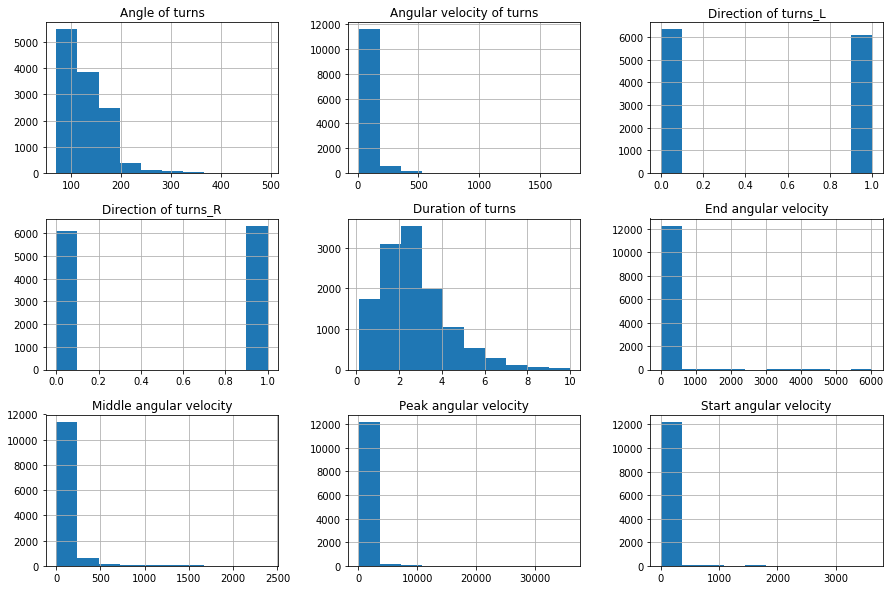

In [74]:
visualizationObject.histogram( dataframe = dataframe )

### Generating visualization #3 ( scatter matrix )

This shows that it is multivariant data analysis. So, I compared the each component among them.

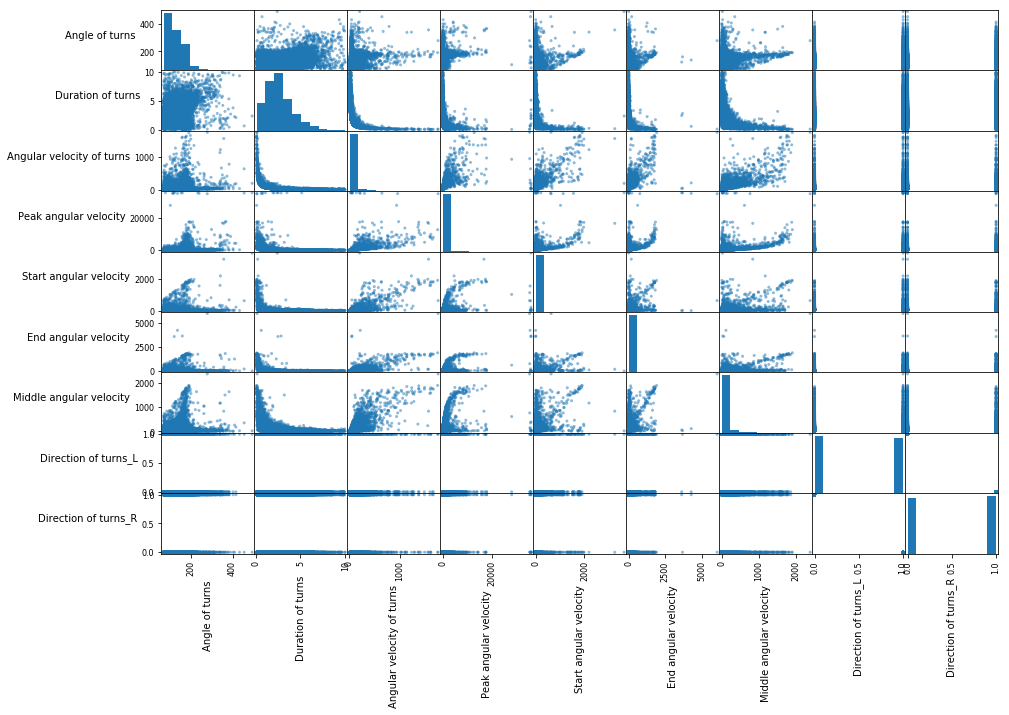

In [75]:
visualizationObject.scatterMatrix( dataframe = dataframe )

### Generating visualization #4 ( day-to-day mean trend )

This shows that status,progress and updates of patient data using day-to-day Trend 

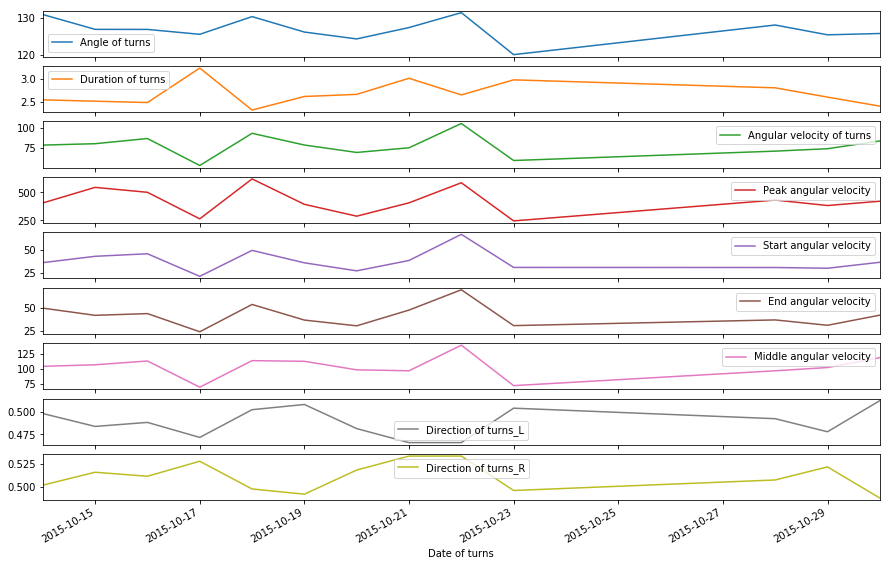

In [76]:
visualizationObject.dayToDayMeanTrend( dataframe = dataframe, subplotEnabled = True, columnName = "Date of turns" )

### Generating statistics #1 ( Basic statistic )

This shows that Count, Means, std, min and max of dataframe 

In [77]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Angle of turns,12409.0,126.893320,44.347082,70.005946,91.164771,119.924765,154.580640,493.836948
Duration of turns,12409.0,2.678534,1.577273,0.100000,1.590000,2.410000,3.460000,9.990000
Angular velocity of turns,12409.0,77.590123,113.269541,7.293424,34.696909,47.568255,74.341805,1745.402042
Peak angular velocity,12409.0,418.183359,1562.707766,14.377538,97.905298,140.875030,267.949453,35995.463030
Start angular velocity,12409.0,37.696503,141.845742,0.072410,4.375074,11.045456,24.982858,3626.309418
End angular velocity,12409.0,41.896482,160.629544,0.167533,6.452217,13.573549,27.045756,6032.094234
Middle angular velocity,12409.0,102.881853,184.356303,0.289921,27.374820,52.794618,97.668261,2389.024493
Direction of turns_L,12409.0,0.490289,0.499926,0.000000,0.000000,0.000000,1.000000,1.000000
Direction of turns_R,12409.0,0.509711,0.499926,0.000000,0.000000,1.000000,1.000000,1.000000


### Generating statistics #2 ( correlation )

This shows that we get the correlation values

In [78]:
corrDf = statisticsObject.correlation( dataframe = dataframe )
print( corrDf )

                           Angle of turns  Duration of turns  \
Angle of turns                   1.000000           0.293045   
Duration of turns                0.293045           1.000000   
Angular velocity of turns        0.209941          -0.453053   
Peak angular velocity            0.242662          -0.208580   
Start angular velocity           0.109064          -0.253207   
End angular velocity             0.094700          -0.234070   
Middle angular velocity          0.180739          -0.395243   
Direction of turns_L             0.003734          -0.027799   
Direction of turns_R            -0.003734           0.027799   

                           Angular velocity of turns  Peak angular velocity  \
Angle of turns                              0.209941               0.242662   
Duration of turns                          -0.453053              -0.208580   
Angular velocity of turns                   1.000000               0.549487   
Peak angular velocity                      

### Generating statistics #3 ( missing values )

This shows that finding the missing values

In [79]:
missingValues = statisticsObject.missingValues( dataframe = dataframe )
print( missingValues )

Angle of turns               0
Duration of turns            0
Angular velocity of turns    0
Peak angular velocity        0
Start angular velocity       0
End angular velocity         0
Middle angular velocity      0
Date of turns                0
Direction of turns_L         0
Direction of turns_R         0
dtype: int64


### Generating statistics #4 ( Z-score )

This shows that we get the Z-score value 

In [80]:
ZscoreDf = statisticsObject.Zscore( dataframe = dataframe )
print( ZscoreDf )

       Angle of turns  Duration of turns  Angular velocity of turns  \
0            0.843355          -1.558787                   5.908201   
1            0.076598          -1.533426                   3.739246   
2           -1.167624          -1.603170                   3.736145   
3           -0.686586          -1.482704                   1.819414   
4            0.686089          -1.279814                   1.419421   
5           -1.030775          -1.076924                   0.046351   
6            1.607523          -1.622191                  13.895778   
7            0.787244          -1.615850                  10.303761   
8           -1.093416          -1.546107                   2.199261   
9           -0.342419           0.558877                  -0.407993   
10           0.066260          -0.049793                  -0.244161   
11          -0.095731          -1.108625                   0.479315   
12          -1.139243          -0.690165                  -0.260951   
13    

[12409 rows x 9 columns]


### Generating statistics #5 ( Number of outliers w.r.t Z-score )

This shows that we get a number of outlier using Z-score

In [81]:
for score in [ 2.5, 3, 3.5, 4 ]:
    statisticsObject.countOutliers( ZscoreDf, score )


When zscore range = 2.5

Angle of turns               241
Duration of turns            294
Angular velocity of turns    292
Peak angular velocity        170
Start angular velocity       190
End angular velocity         199
Middle angular velocity      340
Direction of turns_L           0
Direction of turns_R           0
dtype: int64

Percentage of outliers 

Angle of turns               1.94%
Duration of turns            2.37%
Angular velocity of turns    2.35%
Peak angular velocity        1.37%
Start angular velocity       1.53%
End angular velocity          1.6%
Middle angular velocity      2.74%
Direction of turns_L          0.0%
Direction of turns_R          0.0%
dtype: object

When zscore range = 3

Angle of turns               181
Duration of turns            171
Angular velocity of turns    216
Peak angular velocity        137
Start angular velocity       169
End angular velocity         169
Middle angular velocity      270
Direction of turns_L           0
Direction of turns_R 

### Generating statistics #6 ( skewness )



In [82]:
skewDf = statisticsObject.skewness( dataframe = dataframe  )
print( skewDf )

Angle of turns                1.415446
Duration of turns             1.115395
Angular velocity of turns     6.787013
Peak angular velocity        15.117012
Start angular velocity       10.258314
End angular velocity         13.133047
Middle angular velocity       5.310470
Direction of turns_L          0.038855
Direction of turns_R         -0.038855
dtype: float64
